In [6]:
using NCDatasets

nc = "weights_france_final.nc"

NCDataset(nc) do ds
    w = ds["weights_frac"]
    println("weights_frac size   = ", size(w))
    println("weights_frac dims   = ", dimnames(w))

    lat = ds["latitude"]
    lon = ds["longitude"]
    println("latitude size       = ", size(lat))
    println("longitude size      = ", size(lon))
end


weights_frac size   = (43, 62)
weights_frac dims   = ("latitude", "longitude")
latitude size       = (43,)
longitude size      = (62,)


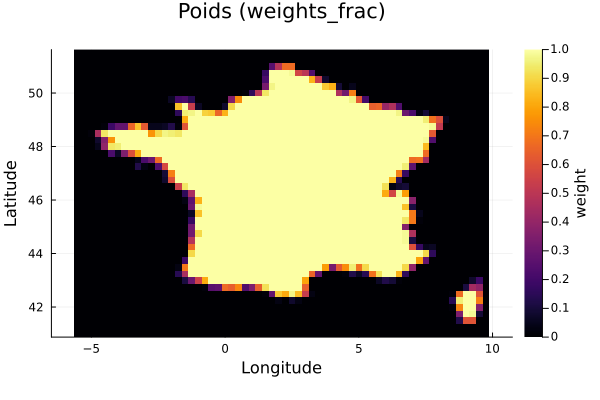

In [ ]:
using NCDatasets, Plots

nc = "weights_france_final.nc"

NCDataset(nc) do ds
    wf  = Array(ds["weights_frac"][:, :])   # <-- garde la forme (43,62)
    lat = Array(ds["latitude"][:])
    lon = Array(ds["longitude"][:])

    wf = Float64.(coalesce.(wf, NaN))

    # Trier latitude/longitude en ordre croissant
    if !issorted(lat)
        p = sortperm(lat)
        lat = lat[p]
        wf = wf[p, :]
    end
    if !issorted(lon)
        p = sortperm(lon)
        lon = lon[p]
        wf = wf[:, p]
    end

    heatmap(lon, lat, wf;
        xlabel="Longitude", ylabel="Latitude",
        title="Poids (weights_frac)",
        colorbar_title="weight",
        aspect_ratio=:equal
    )
end


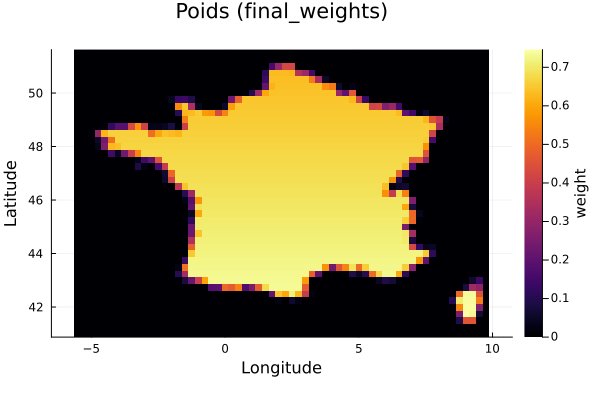

In [ ]:
NCDataset(nc) do ds
    fw  = Array(ds["final_weights"][:, :])
    lat = Array(ds["latitude"][:])
    lon = Array(ds["longitude"][:])

    fw = Float64.(coalesce.(fw, NaN))

    if !issorted(lat)
        p = sortperm(lat)
        lat = lat[p]
        fw = fw[p, :]
    end
    if !issorted(lon)
        p = sortperm(lon)
        lon = lon[p]
        fw = fw[:, p]
    end

    heatmap(lon, lat, fw;
        xlabel="Longitude", ylabel="Latitude",
        title="Poids (final_weights)",
        colorbar_title="weight",
        aspect_ratio=:equal
    )
end
